# Data Analysis with PostgreSQL, psycopg2, and JupyterLab
**Sally, Yoji**

## Our Dataset

### Information

- [2023 Global Country Development & Prosperity Index](https://www.kaggle.com/datasets/tarktunataalt/2023-global-country-development-and-prosperity-index)
  - Provied by kaggle.com
  - Licence: CC BY-SA 4.0
- [World population growth rate by cities 2024](https://www.kaggle.com/datasets/dataanalyst001/world-population-growth-rate-by-cities-2024/data)
  - Provied by kaggle.com
  - Licence: Apache 2.0

### Overview

#### 2023 Global Country Development & Prosperity Index

This dataset includes scores that express country development, such as health, economy level, governance, and so on. It also includes principal countries.  

#### World population growth rate by cities 2024

This dataset includes the population of 2023 and 2024 for each principal city. It also has a growth rate calculated by population increase. 

### Dataset detail

#### 2023 Global Country Development & Prosperity Index

##### Information

- Provied as ".csv"
- Rows: 165

##### Columns

| Coulmn name | Type | description |
| - | - | - |
| Country | varchar | The name of the country |
| AveragScore | deciaml | The overall average score of the country across all indicators |
| SafetySecurity | deciaml | Freedom from conflict, terrorism, and crime |
| PersonelFreedom | deciaml | Rights to speech, assembly, and individual autonomy |
| Governance | deciaml | Quality of democracy, rule of law, and government effectiveness |
| SocialCapital | deciaml | Strength of personal relationships and civic engagement |
| InvestmentEnvironment | deciaml | Conditions for private investment and credit access |
| EnterpriseConditions | deciaml | Business environment and market competition |
| MarketAccessInfrastructure | deciaml | Ease of trade and quality of infrastructure |
| EconomicQuality | deciaml | Macroeconomic stability and employment quality |

#### World population growth rate by cities 2024

##### Information

- Provied as ".csv"
- Rows: 801

##### Columns

| Coulmn name | Type | description |
| - | - | - |
| City | varchar | Name of the city. |
| Country | varchar | Name of the country in which the that city located in. |
| Continent | varchar | Name of the continent in which the that city located in. |
| Population (2024) | integer | Population 2024 |
| Population (2023) | integer | Population 2023 |
| Growth Rate | decimal | Growth rate of the city. |

## Our expectation

A city with a high population or high growth rate might have a specific reason. For example, some countries have great health services or greater economic systems. We wanted to meet this expectation, so we chose these two datasets. Because the  2023 Global Country Development & Prosperity Index has scores from many points of view, it will be helpful to analyze.

## Data analysis

### Save data into PostgreSQL

Before running the following code, we made the database 'final_project' through PGadmin.  
To connect local PostgreSQL, run this code

In [4]:
import psycopg2
# Connect to your postgres DB
passward = input("Enter your password: ")

conn = psycopg2.connect(
dbname="final_project",
user="postgres",
password=passward,
host="localhost",
port="5432"
)
cur = conn.cursor()

### Create table and import data from csv

In [2]:
# Create a new table
cur.execute(
    """
    CREATE TABLE population_growth (
    id SERIAL PRIMARY KEY, 
    city varchar, 
    country varchar, 
    continent varchar, 
    population_2024 integer, 
    population_2023 integer, 
    growth_rate decimal)
    """
)
# Commit the changes
conn.commit()

In [5]:
import csv

with open('./Wprld population growth rate by cities 2024.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        values = [str(d) for d in row[:6]]
        values[0] = "'" + values[0] + "'"
        values[1] = "'" + values[1] + "'"
        values[2] = "'" + values[2] + "'"
        
        values = ", ".join(values)

        cur.execute(
            "INSERT INTO population_growth "
            "(city, country, continent, population_2024, population_2023, growth_rate) "
            "VALUES ("+values+")"
        )
    conn.commit()


In [6]:
# Create a new table
cur.execute(
    """
    CREATE TABLE global_country_development (
    id SERIAL PRIMARY KEY, 
    country varchar, 
    average_score decimal, 
    safety_security decimal, 
    personel_freedom decimal, 
    governance decimal, 
    social_capital decimal, 
    investment_enviroment decimal, 
    enterprise_conditions decimal, 
    market_access_infrastructure decimal, 
    economic_quality decimal, 
    living_conditions decimal, 
    health decimal, 
    education decimal, 
    national_enviroment decimal)
    """
)
# Commit the changes
conn.commit()

In [7]:
with open('./2023 Global Country Development & Prosperity Index.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        values = [str(d) for d in row[:14]]
        values[0] = "'" + values[0] + "'"
        values = ", ".join(values)
        
        cur.execute(
            "INSERT INTO global_country_development "
            "(country, average_score, safety_security, personel_freedom, governance, social_capital, investment_enviroment, enterprise_conditions, "
            "market_access_infrastructure, economic_quality,living_conditions, health, education, national_enviroment) "
            "VALUES ("+values+")"
        )
        
    conn.commit()

### Create temporary table

- population_growth table has approximately 800 cities, but we focused on one city for each country.  
- we chose a city which has the highest population in 2024.  
- After making subquery, we used "JOIN" statement to combine global_country_development table.

In [8]:
cur.execute(
    """
    WITH subquery_hightest_population_cities AS (
        SELECT city, country, continent, population_2024, growth_rate 
        FROM (
            population_growth 
            JOIN (
                SELECT MAX(population_2024) AS max_population_2024 
                FROM population_growth 
                GROUP BY country 
            ) ON population_2024 = max_population_2024
        ) 
    ) 

    SELECT * 
    INTO TEMP TABLE temp_hightest_population_cities_with_development 
    FROM subquery_hightest_population_cities 
    JOIN global_country_development USING (country) 
    """
)


We wanted to check if we could store data as we wanted and display 10 data.

In [9]:
cur.execute(
    """
    SELECT * 
    FROM temp_hightest_population_cities_with_development 
    LIMIT 10
    """
)

cur.fetchall()

[('Japan',
  'Tokyo',
  'Asia',
  37115035,
  Decimal('-0.0021'),
  16,
  Decimal('78.22'),
  Decimal('92.78'),
  Decimal('79.14'),
  Decimal('79.67'),
  Decimal('43.82'),
  Decimal('83.1'),
  Decimal('80.11'),
  Decimal('79.32'),
  Decimal('66.35'),
  Decimal('92.86'),
  Decimal('86.5'),
  Decimal('84.93'),
  Decimal('70.11')),
 ('India',
  'Delhi',
  'Asia',
  33807403,
  Decimal('0.0263'),
  102,
  Decimal('53.66'),
  Decimal('51.89'),
  Decimal('47.4'),
  Decimal('56.03'),
  Decimal('48.42'),
  Decimal('56.59'),
  Decimal('64.33'),
  Decimal('56.59'),
  Decimal('48.4'),
  Decimal('55.9'),
  Decimal('66.16'),
  Decimal('50.46'),
  Decimal('41.78')),
 ('China',
  'Shanghai',
  'Asia',
  29867918,
  Decimal('0.0225'),
  54,
  Decimal('62.15'),
  Decimal('67.96'),
  Decimal('21.22'),
  Decimal('48.47'),
  Decimal('62.67'),
  Decimal('57.29'),
  Decimal('64.41'),
  Decimal('69.02'),
  Decimal('68.46'),
  Decimal('85.05'),
  Decimal('83.11'),
  Decimal('70.42'),
  Decimal('47.69')),
 ('B

In [10]:
import pandas.io.sql as sqlio
data = sqlio.read_sql_query(
    """
    SELECT * 
    FROM temp_hightest_population_cities_with_development
    """
    , conn)
data.head()


C:\Users\UtsumiYoji\AppData\Local\Temp\ipykernel_28612\790382674.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(


,country,city,continent,population_2024,growth_rate,id,average_score,safety_security,personel_freedom,governance,social_capital,investment_enviroment,enterprise_conditions,market_access_infrastructure,economic_quality,living_conditions,health,education,national_enviroment
0,Japan,Tokyo,Asia,37115035,-0.0021,16,78.22,92.78,79.14,79.67,43.82,83.10,80.11,79.32,66.35,92.86,86.50,84.93,70.11
1,India,Delhi,Asia,33807403,0.0263,102,53.66,51.89,47.40,56.03,48.42,56.59,64.33,56.59,48.40,55.90,66.16,50.46,41.78
2,China,Shanghai,Asia,29867918,0.0225,54,62.15,67.96,21.22,48.47,62.67,57.29,64.41,69.02,68.46,85.05,83.11,70.42,47.69
3,Bangladesh,Dhaka,Asia,23935652,0.0313,122,47.87,50.62,39.87,36.25,50.95,38.18,52.44,47.76,45.09,57.09,67.39,44.19,44.58
4,Brazil,Sao Paulo,South America,22806704,0.0083,66,60.07,60.14,63.15,47.12,61.83,54.58,46.85,54.45,50.58,81.37,71.68,59.71,69.35


### Corelation between health and growth rate - 1

This graph is a dataset with the top 30 highest-population cities.    
A city with great health tends to have a low growth rate.  
One interesting factor here is that New York has a significantly low growth rate, considering it is in good health.


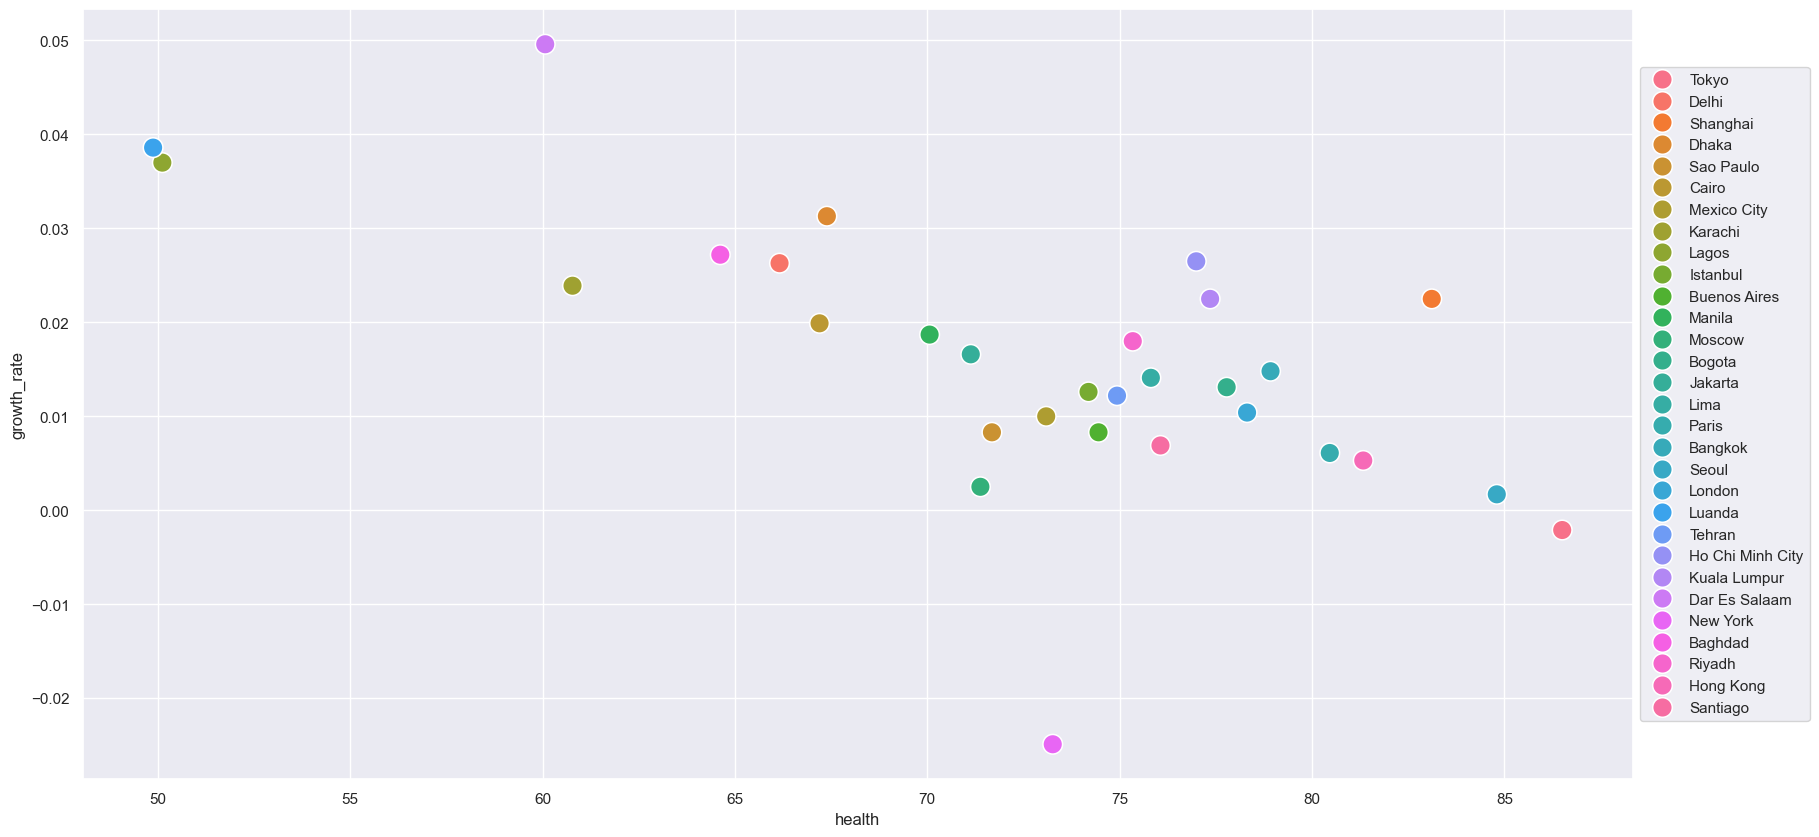

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(rc={"figure.figsize": (20, 10)})

g = sns.scatterplot(
    x='health',
    y='growth_rate',
    data=data.head(30),
    hue='city',
    s=200
)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Correlation between health and growth rate - 2

Next, we sorted the top 30 cities with health.  
 Except for Tokyo, the rest of the cities have positive growth rates.

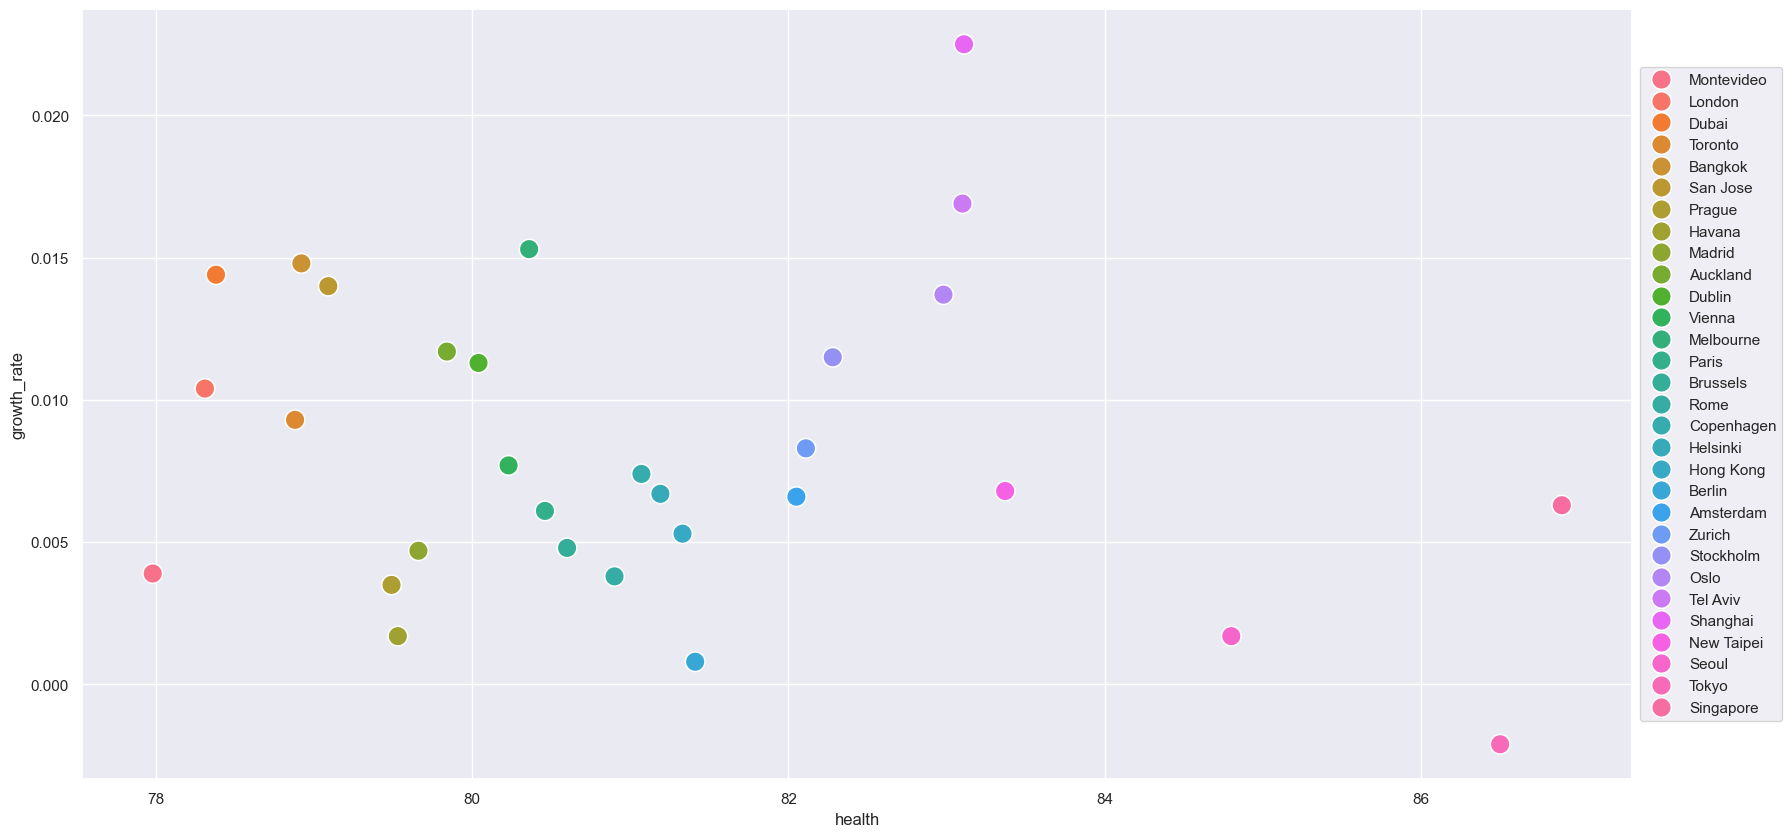

In [14]:
g = sns.scatterplot(
    x='health',
    y='growth_rate',
    data=data.sort_values(by=['health']).tail(30),
    hue='city',
    s=200      
)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## 

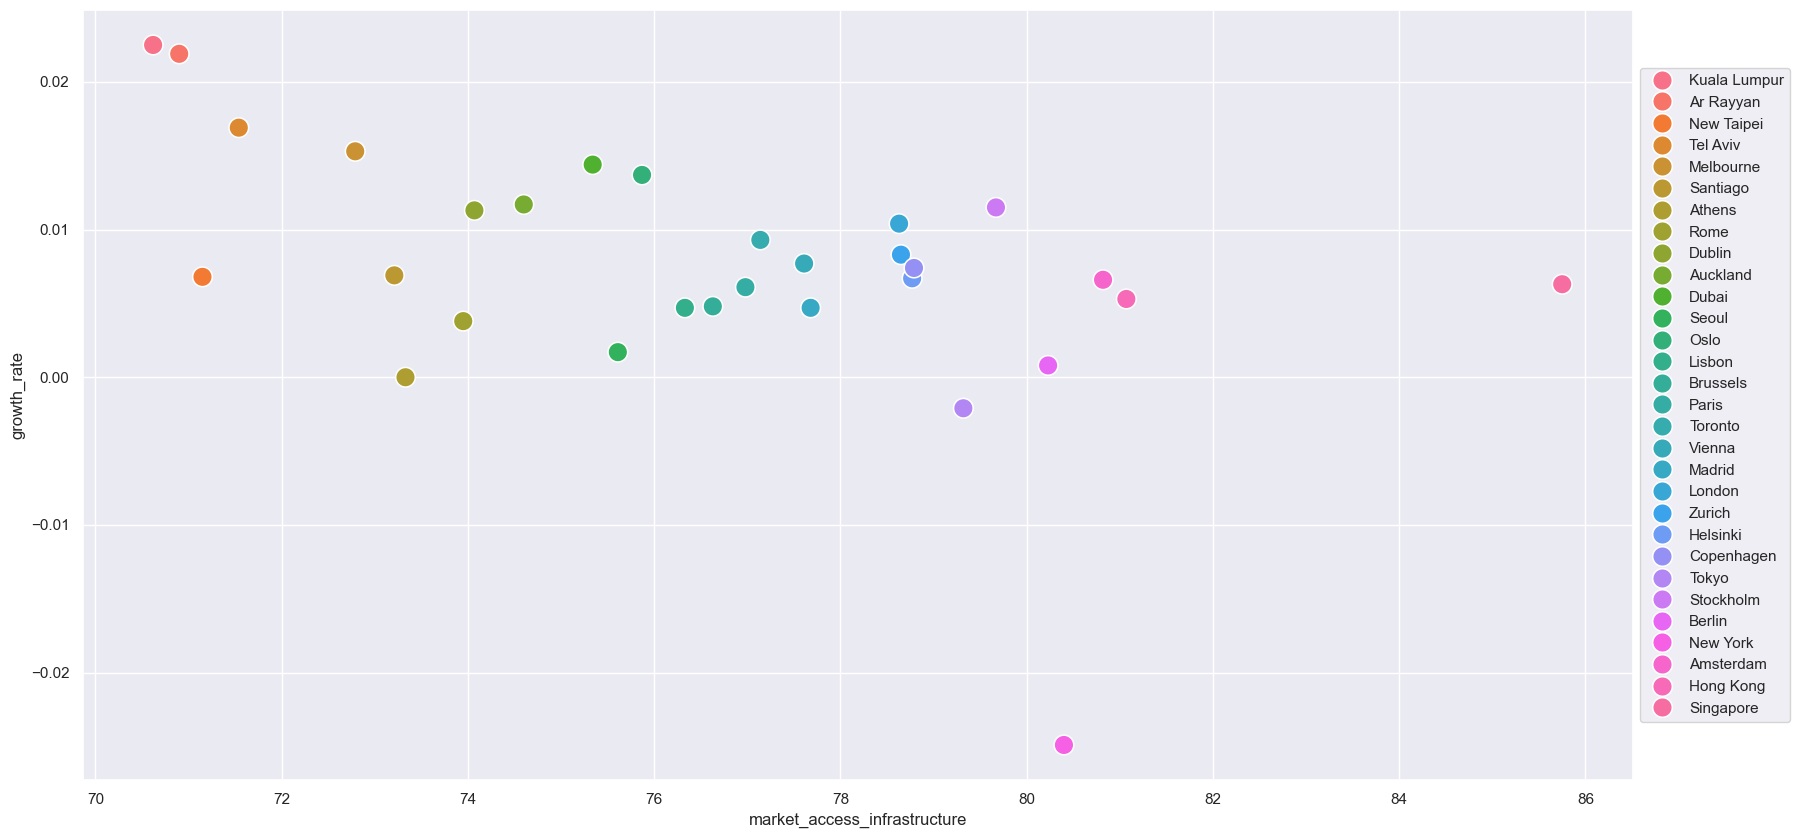

In [15]:
g = sns.scatterplot(
    x='market_access_infrastructure',
    y='growth_rate',
    data=data.sort_values(by=['market_access_infrastructure']).tail(30),
    hue='city',
    s=200
)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Highest and lowest growth rate by continent
Highest: Africa  
Lowest: Europe 

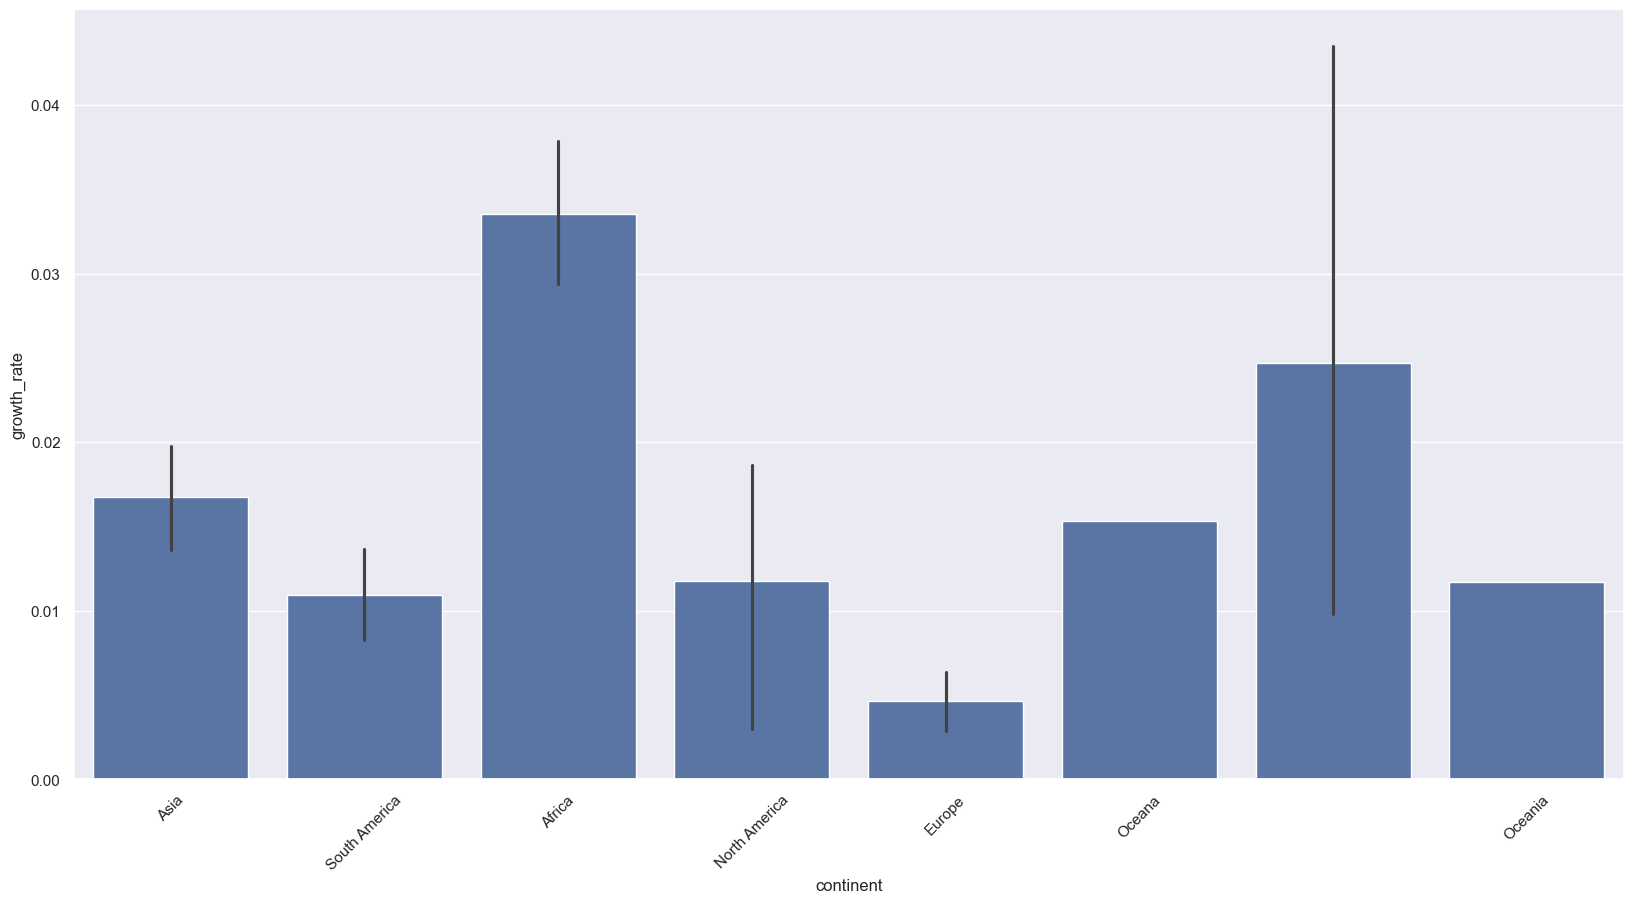

In [16]:
g = sns.barplot(
    x='continent',
    y='growth_rate',
    data=data,
)
plt.xticks(rotation=45)
plt.show()

The average score has nothing much to do with the growth rate of each continent.  
However, Europe has the apposite relationship between growth rate and average score.

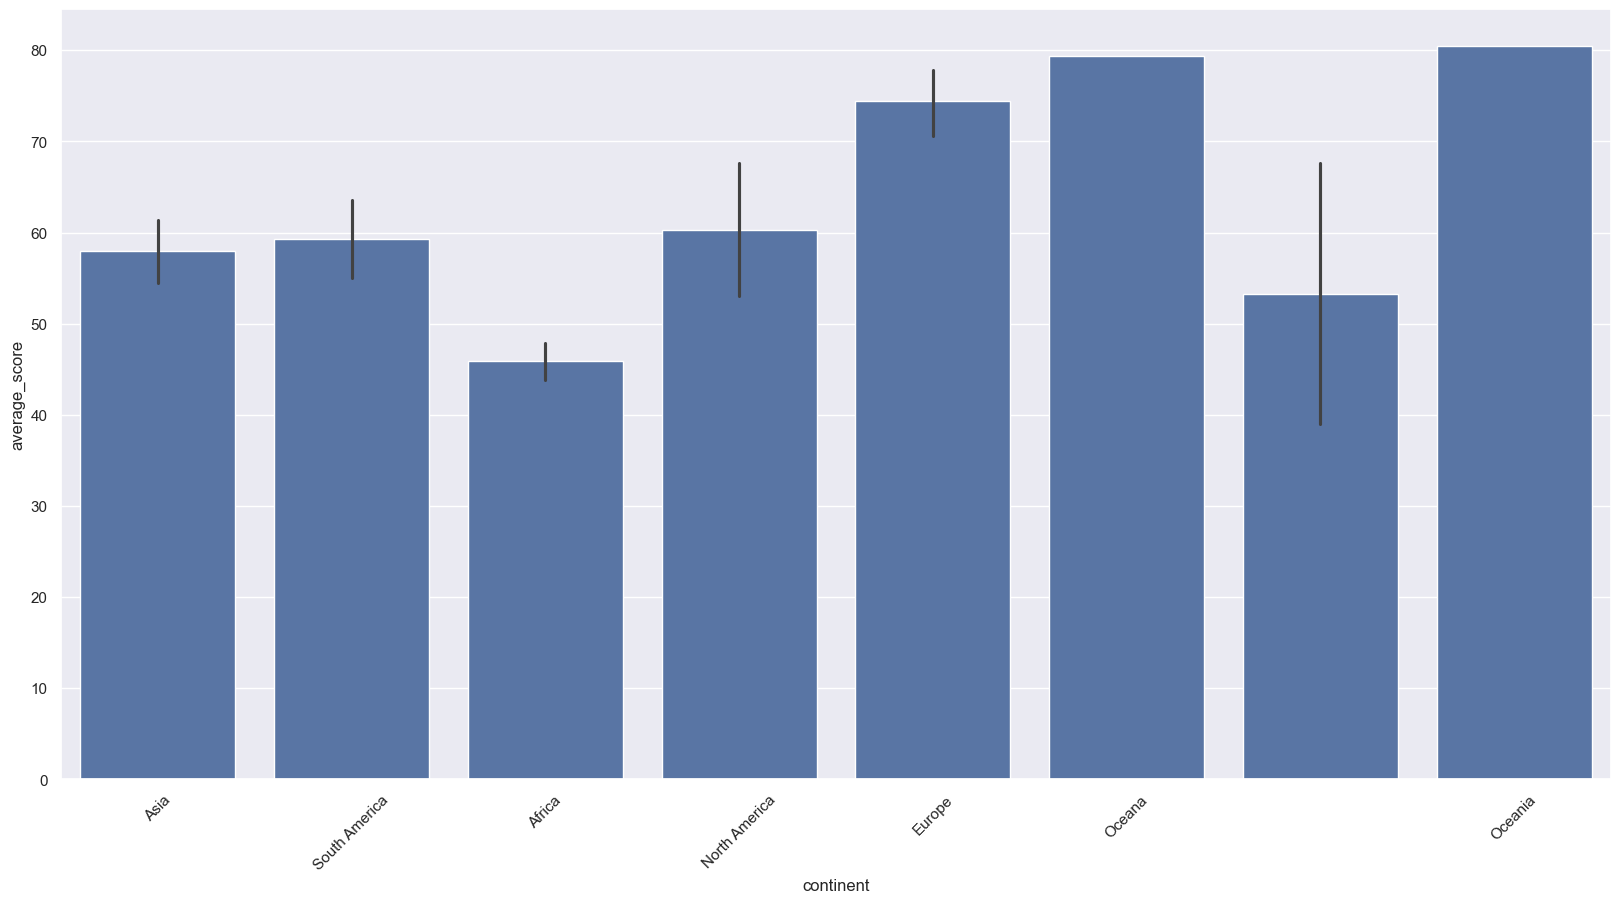

In [17]:
g = sns.barplot(
    x='continent',
    y='average_score',
    data=data,
)
plt.xticks(rotation=45)
plt.show()

Growth rates in Africa appear to have the highest growth rate between 2023 and 2024 despite the economy staying low.

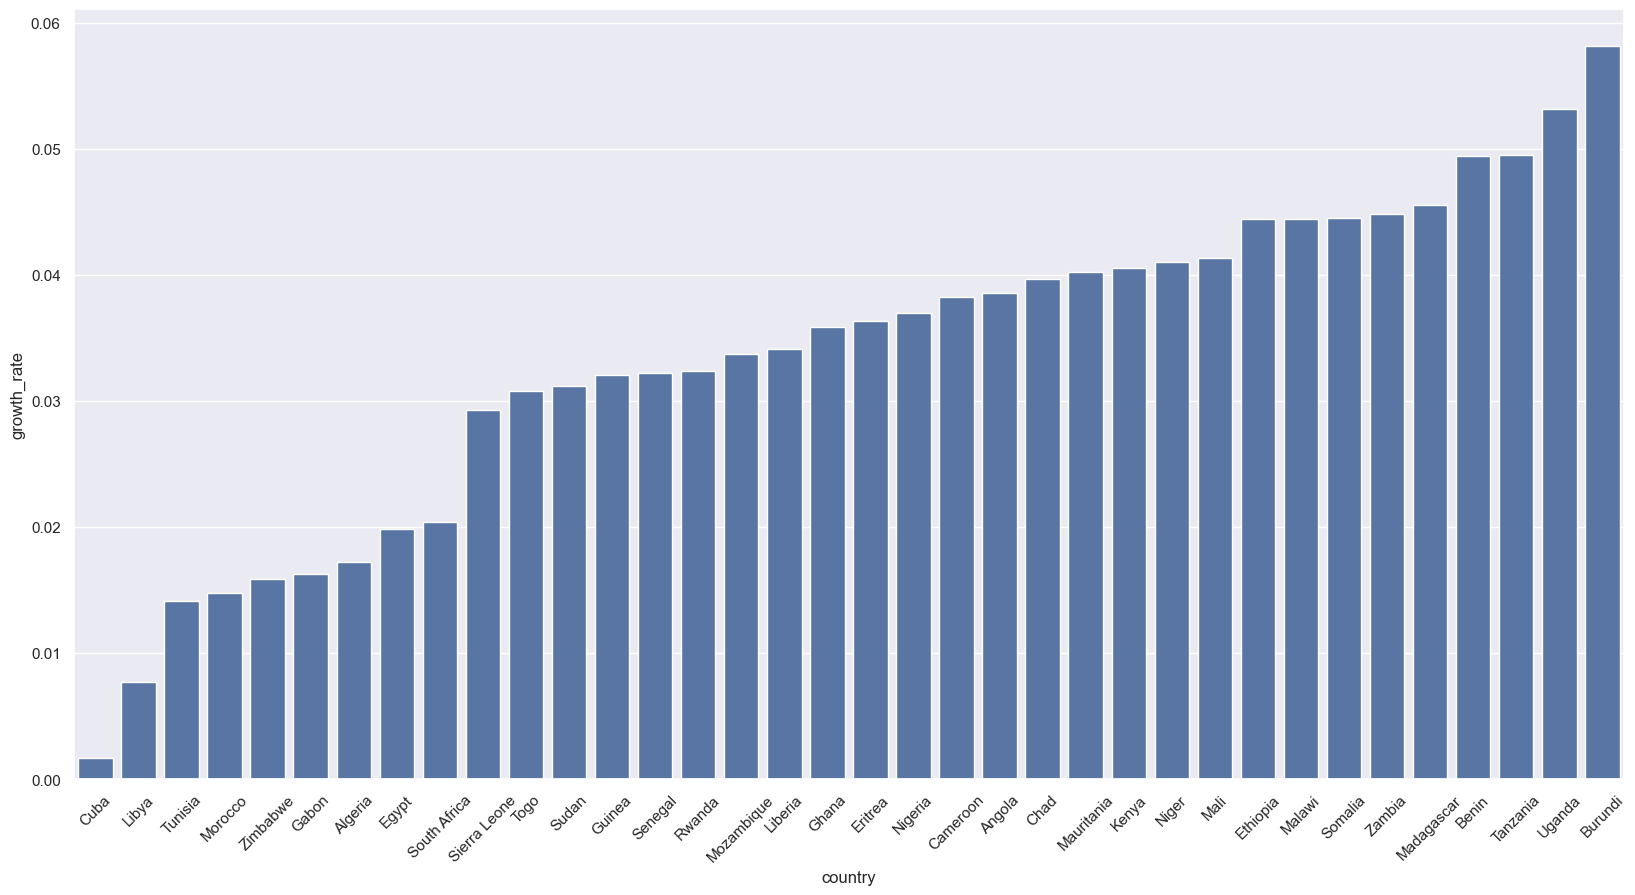

In [18]:
g = sns.barplot(
    x='country',
    y='growth_rate',
    data=data[data['continent']=='Africa'].sort_values(by=['growth_rate']),
)

plt.xticks(rotation=45)
plt.show()

C:\Users\UtsumiYoji\AppData\Local\Temp\ipykernel_28612\90910328.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.legend(loc='center left', bbox_to_anchor=(1, 0.5))


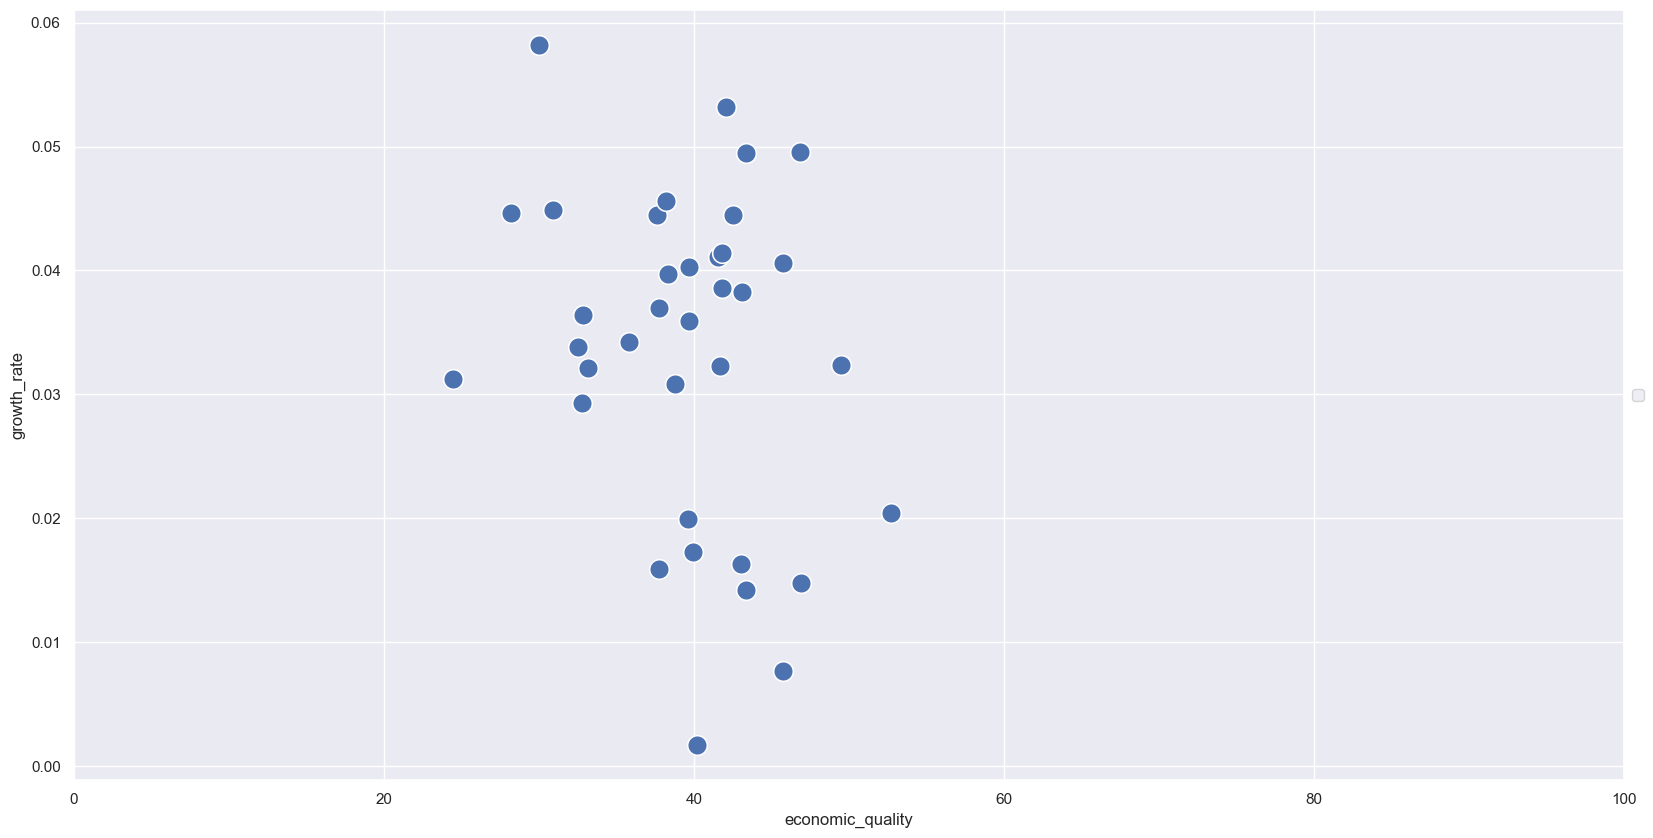

In [19]:
g = sns.scatterplot(
    x='economic_quality',
    y='growth_rate',
    data=data[data['continent']=='Africa'].sort_values(by=['growth_rate']),
    s=200
)

plt.xlim([0, 100])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
cur.close()
conn.close()

## Conclusion
- Cities with good health and relatively good security tend to have a positive growth rate, but the rate does not vary much among cities.
- We found out that Africa has the highest growth rate, although the average score, which includes various factors such as economic quality, infrastructure system, education, personal freedom, and so on, is significantly low. 
- In the bottom line, we believe that there are more contributions and cultural factors that cannot be numberized in order to explain the growth rate in terms of the population worldwide. 